In [4]:
import numpy as np

In [5]:
nvec = np.array([-0.60418, 0.79684, 0])

In [6]:
t0 = np.array([-0.24128501, -0.42430658, -0.87278031])

In [7]:
t1 = np.array([-0.47368418, -0.11780416, -0.87278031 ])

In [8]:
np.arccos(np.dot(nvec,t0))

1.7643270317686286

In [9]:
np.pi - np.arccos(np.dot(nvec,t1))

1.7643214914945242

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_unit_vector_lambertian(n):
    # Generate a random azimuthal angle phi
    phi = 2 * np.pi * np.random.rand()

    # Generate a random cos(theta) value following Lambert's cosine law
    theta = np.arcsin(np.random.uniform(0, 1)) 
    cos_theta = np.cos(theta)

    # Calculate the new unit vector based on spherical coordinates
    sin_theta = np.sin(theta)
    x = sin_theta * np.cos(phi)
    y = sin_theta * np.sin(phi)
    z = cos_theta

    # Calculate the transformation matrix to rotate the vector onto n
    rotation_matrix = rotation_matrix_from_z_to_n(n)

    # Rotate the vector onto n
    new_unit_vector = np.dot(rotation_matrix, np.array([x, y, z]))

    return new_unit_vector

def rotation_matrix_from_z_to_n(n):
    # Ensure n is a unit vector
    n = n / np.linalg.norm(n)

    # Calculate the rotation axis and angle
    rotation_axis = np.cross([0, 0, 1], n)
    rotation_angle = np.arccos(np.dot([0, 0, 1], n))

    # Calculate the rotation matrix using Rodrigues' formula
    K = np.array([[0, -rotation_axis[2], rotation_axis[1]],
                  [rotation_axis[2], 0, -rotation_axis[0]],
                  [-rotation_axis[1], rotation_axis[0], 0]])

    rotation_matrix = np.eye(3) + np.sin(rotation_angle) * K + (1 - np.cos(rotation_angle)) * np.dot(K, K)

    return rotation_matrix

In [11]:
nvec = np.array([0,0,1])  # Example unit vector (normalized)
n = 10000

cost = np.zeros(n)

for i in range(n):
    new_unit_vector = generate_random_unit_vector_lambertian(nvec)
    
    cost[i] = np.dot(nvec,new_unit_vector)

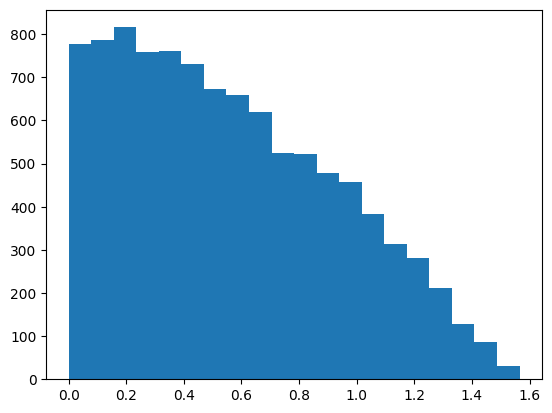

In [12]:
h=plt.hist(np.arccos(cost), bins=20)

In [13]:
1/1.6


0.625